In [ ]:
# explore Methods in numPy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


results_df = pd.read_csv(f'output/updated_grid_search_results_cosine.csv')
results_df.rename(columns={'nodoc': 'nodoc_model'}, inplace=True)
results_df.columns
cols = ['name_model', 'code_model', 'docstring_model', 'nodoc_model', 'k',
       'name_hits', 'code_hits', 'docstring_hits', 'nodoc_hits','wnodoc_hits', 'total_methods']
results_df = results_df[cols]

hits = ['name_hits', 'code_hits', 'docstring_hits', 'nodoc_hits','wnodoc_hits']
print('Results:',results_df.shape)

results_df

In [ ]:
import pandas as pd

# Load the results
results_df = pd.read_csv('output/updated_grid_search_results_cosine.csv')
results_df.rename(columns={'nodoc': 'nodoc_model'}, inplace=True)

# Standardize columns of interest
cols = ['name_model', 'code_model', 'docstring_model', 'nodoc_model', 'k',
        'name_hits', 'code_hits', 'docstring_hits', 'nodoc_hits', 'wnodoc_hits', 'total_methods']
results_df = results_df[cols]

# Normalize hits by total_methods to get comparable performance scores
for hit in ['name_hits', 'code_hits', 'docstring_hits', 'nodoc_hits']:
    norm_col = f'{hit}_norm'
    results_df[norm_col] = results_df[hit] / results_df['total_methods']

# Define preferred k values and model types
focus_ks = [1,3, 5, 7, 10, 15]
model_types = ['name', 'code', 'docstring', 'nodoc']

df_focus = results_df[results_df['k'].isin(focus_ks)]


# model consistency across ks: average normalized hit rate
model_scores = {}
for model_type in model_types:
    model_col = f'{model_type}_model'
    norm_col = f'{model_type}_hits_norm'
    grouped = results_df[results_df['k'].isin(focus_ks)].groupby(model_col)[norm_col].mean()
    model_scores[model_type] = grouped.sort_values(ascending=False).head(5)  # top 5 per type

model_scores

{'name': name_model
 ibm-granite/granite-embedding-125m-english    0.376736
 avsolatorio/GIST-large-Embedding-v0           0.338542
 w601sxs/b1ade-embed                           0.331597
 avsolatorio/GIST-Embedding-v0                 0.322917
 intfloat/e5-large-v2                          0.270833
 Name: name_hits_norm, dtype: float64,
 'code': code_model
 w601sxs/b1ade-embed                           0.656250
 ibm-granite/granite-embedding-125m-english    0.649306
 avsolatorio/GIST-large-Embedding-v0           0.647569
 avsolatorio/GIST-Embedding-v0                 0.645833
 intfloat/e5-large-v2                          0.571181
 Name: code_hits_norm, dtype: float64,
 'docstring': docstring_model
 ibm-granite/granite-embedding-125m-english    0.506944
 avsolatorio/GIST-large-Embedding-v0           0.477431
 avsolatorio/GIST-Embedding-v0                 0.470486
 w601sxs/b1ade-embed                           0.467014
 intfloat/e5-large-v2                          0.409722
 Name: docst

In [ ]:
best_model_config = {
    'name': 'ibm-granite/granite-embedding-125m-english',
    'code': 'w601sxs/b1ade-embed',
    'doc': 'ibm-granite/granite-embedding-125m-english',
    'nodoc': 'avsolatorio/GIST-large-Embedding-v0'
    
}


In [ ]:
## Best Result combination so far


k_grouped = results_df.groupby(['k'])

# sort each the group on max of name code docstring and nodoc
def sort_group(temp, feature='name_hits', top_k=3):
    group = temp.copy()
    
    if feature:
        group = group.sort_values(by=feature, ascending=False)
    else:
        group= group.sort_values(by=['name_hits', 'code_hits', 'docstring_hits', 'nodoc_hits','wnodoc_hits'], ascending=False)
    # keep the top 2
    model_column = feature.replace('_hits', '_model')  # e.g., 'name_hits' → 'name_model'
    group = group.drop_duplicates(subset=[model_column])

    # Return only top_k entries
    return group.head(top_k)

# sorted_groups = k_grouped.apply(sort_group, feature='code_hits')
sorted_groups = k_grouped.apply(sort_group)
sorted_groups = sorted_groups.reset_index(drop=True)
sorted_groups

/var/folders/1s/d6cby_d90fsfb94qvy0p0ttm0000gn/T/ipykernel_14696/1791873748.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_groups = k_grouped.apply(sort_group)


,name_model,code_model,docstring_model,nodoc_model,k,name_hits,code_hits,docstring_hits,nodoc_hits,wnodoc_hits,total_methods,name_hits_norm,code_hits_norm,docstring_hits_norm,nodoc_hits_norm
0,w601sxs/b1ade-embed,w601sxs/b1ade-embed,w601sxs/b1ade-embed,w601sxs/b1ade-embed,1,6,26,23,15,15,96,0.062500,0.270833,0.239583,0.156250
1,ibm-granite/granite-embedding-125m-english,Alibaba-NLP/gte-large-en-v1.5,avsolatorio/GIST-large-Embedding-v0,Alibaba-NLP/gte-large-en-v1.5,1,5,21,25,19,17,96,0.052083,0.218750,0.260417,0.197917
2,avsolatorio/GIST-large-Embedding-v0,w601sxs/b1ade-embed,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,1,5,26,23,14,7,96,0.052083,0.270833,0.239583,0.145833
3,ibm-granite/granite-embedding-125m-english,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,3,26,39,27,36,39,96,0.270833,0.406250,0.281250,0.375000
4,w601sxs/b1ade-embed,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,3,25,39,27,36,42,96,0.260417,0.406250,0.281250,0.375000
5,avsolatorio/GIST-large-Embedding-v0,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,3,23,39,27,36,40,96,0.239583,0.406250,0.281250,0.375000
6,ibm-granite/granite-embedding-125m-english,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,5,39,44,29,45,49,96,0.406250,0.458333,0.302083,0.468750
7,w601sxs/b1ade-embed,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,5,33,44,29,45,51,96,0.343750,0.458333,0.302083,0.468750
8,avsolatorio/GIST-large-Embedding-v0,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,5,32,44,29,45,50,96,0.333333,0.458333,0.302083,0.468750
9,ibm-granite/granite-embedding-125m-english,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,Alibaba-NLP/gte-large-en-v1.5,7,43,46,30,53,55,96,0.447917,0.479167,0.312500,0.552083


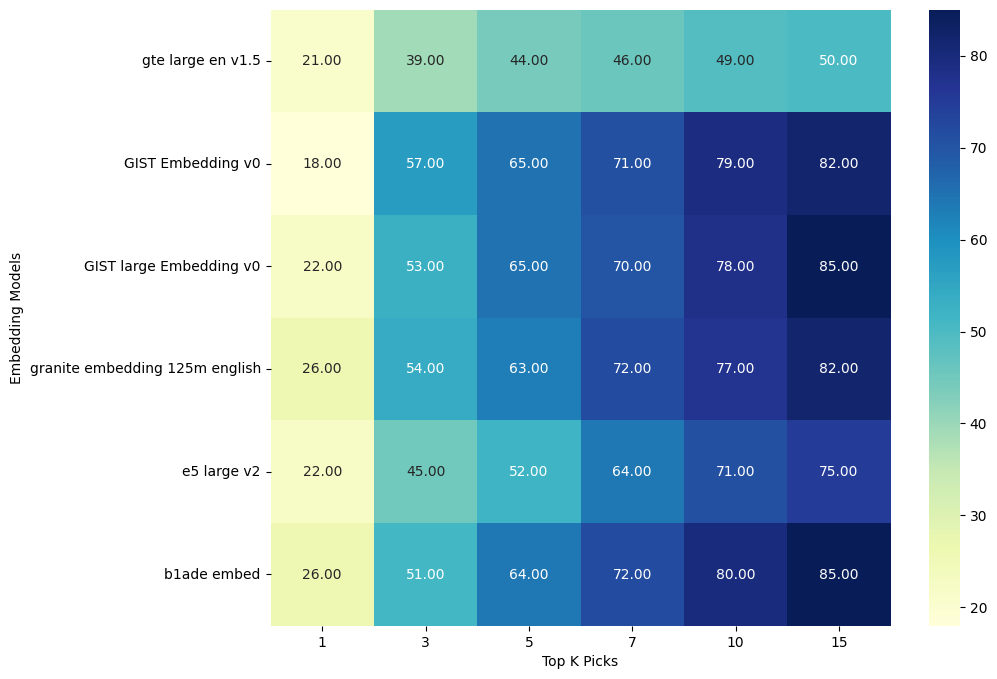

In [ ]:
# plot heat map
def plot_heatmap(results_df, x, y, z):
    results_df = results_df.sort_values(by=[z], ascending=[ False])
    # pivot the dataframe
    pivot_df = results_df.pivot_table(index=y, columns=x, values=z)
    # remove first part of name in y cols split by /
    pivot_df.index = pivot_df.index.str.split('/').str[1]
    pivot_df.index = pivot_df.index.str.replace('-', ' ')
    # campitalize the index
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel("Top K Picks")
    plt.ylabel("Embedding Models")
    plt.show()
plot_heatmap(results_df, 'k', 'code_model', 'code_hits')


In [ ]:
d2 = results_df
d2.rename(columns={'nodoc': 'nodoc_model'}, inplace=True)

resultsgrouped_df = d2.groupby('k')

max_df = pd.DataFrame()

def tophits(df):
    hits = {
        'name_hits': df['name_hits'].max(),
        'code_hits': df['code_hits'].max(),
        'docstring_hits': df['docstring_hits'].max(),
        'nodoc_hits': df['nodoc_hits'].max(),
        # 'mean_hits': df['mean_hits'].max(),
        'wnodoc_hits': df['wnodoc_hits'].max(),
        # # 'wcode_hits': df['wcode_hits'].max(),
        # 'quota_hits': df['quota_hits'].max(),
    }
    top_models= {
        'name_model': df['name_model'].loc[df['name_hits'].idxmax()],
        'code_model': df['code_model'].loc[df['code_hits'].idxmax()],
        'docstring_model': df['docstring_model'].loc[df['docstring_hits'].idxmax()],
        'nodoc_model': df['nodoc_model'].loc[df['nodoc_hits'].idxmax()],
    }

    # build the row with top models and top row 
    row = {
        'k': df['k'].iloc[0],
        'name_model': top_models['name_model'],
        'code_model': top_models['code_model'],
        'docstring_model': top_models['docstring_model'],
        'nodoc_model': top_models['nodoc_model'],
        'name_hits': hits['name_hits'],
        'code_hits': hits['code_hits'],
        'docstring_hits': hits['docstring_hits'],
        'nodoc_hits': hits['nodoc_hits'],
        # 'mean_hits': hits['mean_hits'],
        'wnodoc_hits': hits['wnodoc_hits'],
        # # 'wcode_hits': hits['wcode_hits'],
        # 'quota_hits': hits['quota_hits'],
    }
    return row

def specific_mode(df, best_model_config):

    # search for rows where all the models are model_name
    df = df[df['name_model'] == best_model_config['name']]
    # check if the model_name is in the dataframe
    df = df[df['code_model'] == best_model_config['code']]
    # check if the model_name is in the dataframe
    df = df[df['docstring_model'] == best_model_config['doc']]
    # check if the model_name is in the dataframe

    df = df[df['nodoc_model'] == best_model_config['nodoc']]
    # check if the model_name is in the datafram
    return df

    


rows = []

for k, group in resultsgrouped_df:
    if k == 7:
        continue

    max_row = tophits(group)
    rows.append(max_row)
    # concatenate the max_row to the max_df
max_df = pd.DataFrame(rows)

unique_best = pd.DataFrame()


for k, group in resultsgrouped_df:
    model_df = specific_mode(group, best_model_config)
    # concatenate the model_df to the unique_best
    unique_best = pd.concat([unique_best, model_df], ignore_index=True)




In [ ]:
unique_best

,name_model,code_model,docstring_model,nodoc_model,k,name_hits,code_hits,docstring_hits,nodoc_hits,wnodoc_hits,total_methods,name_hits_norm,code_hits_norm,docstring_hits_norm,nodoc_hits_norm
0,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,1,5,26,22,17,14,96,0.052083,0.270833,0.229167,0.177083
1,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,3,26,51,41,46,47,96,0.270833,0.531250,0.427083,0.479167
2,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,5,39,64,51,55,53,96,0.406250,0.666667,0.531250,0.572917
3,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,7,43,72,51,60,59,96,0.447917,0.750000,0.531250,0.625000
4,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,10,49,80,62,66,70,96,0.510417,0.833333,0.645833,0.687500
5,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,15,55,85,65,74,77,96,0.572917,0.885417,0.677083,0.770833


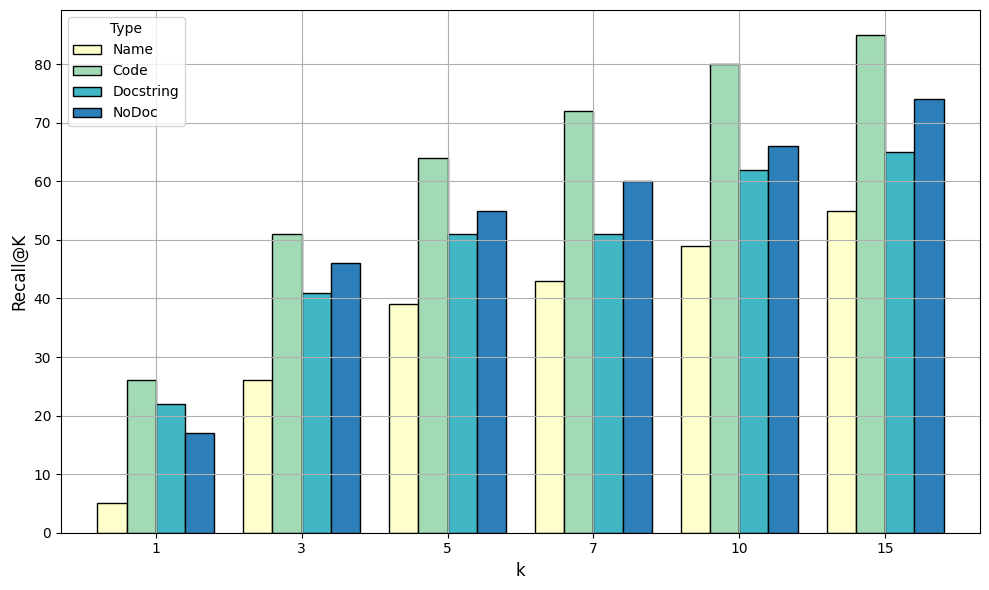

In [ ]:
def plot_multi_bar_chart(df, x, y, custom_labels=None):
    df = df.copy()  # Avoid modifying the original DataFrame
    df.set_index(x, inplace=True)

    custom_colors = ['#FFFFCC', '#A1DAB4', '#41B6C4', '#2C7FB8']

    # Plot
    ax = df[y].plot(kind='bar', figsize=(10, 6), color=custom_colors, width=0.8, edgecolor='black')
    plt.xlabel(x, fontsize=12)
    plt.ylabel('Recall@K', fontsize=12)
    plt.xticks(rotation=0)

    plt.grid(True)
    if custom_labels:
        plt.legend(custom_labels, loc='upper left', title='Type')
    else:
        plt.legend(loc='upper left', title='Type')
    plt.tight_layout()
    plt.savefig('images/rq1.png', transparent=True)

# Usage with custom labels
plot_multi_bar_chart(
    unique_best,
    'k',
    ['name_hits', 'code_hits', 'docstring_hits', 'nodoc_hits'],
    custom_labels=['Name', 'Code', 'Docstring', 'NoDoc']
)

In [ ]:
from typing import List

search_df = pd.read_csv('output/grid_search_data_cosine.csv')

def compute_libwise_hits(
    search_df: pd.DataFrame,
    selected_libs: List[str],
    model_type: str,
    model_name: str
) -> pd.DataFrame:
    """
    Compute total methods and verified hits per library for each top-k level.

    Returns a DataFrame with: library_name, k, verified_hits, total_methods
    """
    # Filter for given model_type and model_name
    df = search_df[
        (search_df["model_type"] == model_type) &
        (search_df["model_name"] == model_name) &
        (search_df["library_name"].isin(selected_libs))
    ].copy()

    libwise_agg = []

    # Get unique Ks and Libraries
    topks = sorted(df["k"].unique())
    libraries = sorted(df["library_name"].unique())

    for lib in libraries:
        lib_df = df[df["library_name"] == lib]
        total_methods = lib_df["removed_id"].nunique()

        for k_val in topks:
            df_k = lib_df[lib_df["k"] == k_val]

            # Count how many unique removed_ids are verified at this k
            verified_hits = df_k[df_k["verified"] == True]["removed_id"].nunique()

            libwise_agg.append({
                "library_name": lib,
                "k": k_val,
                "verified_hits": verified_hits,
                "total_methods": total_methods
            })

    return pd.DataFrame(libwise_agg)



libwise_agg_df = compute_libwise_hits(
    search_df=search_df,
    selected_libs=['pydantic', 'scipy', 'pandas', 'sqlalchemy', 'numpy', 'pytorch'],
    model_type='code',
    model_name='avsolatorio/GIST-large-Embedding-v0'
)



def build_topk_libwise_table(libwise_agg_df: pd.DataFrame) -> pd.DataFrame:
    """
    Build a pivot table with Libraries as rows and Top-K values as columns,
    containing percentage of verified hits (not cumulative), normalized by total methods.
    """
    # Ensure clean types
    libwise_agg_df = libwise_agg_df.copy()
    libwise_agg_df["library_name"] = libwise_agg_df["library_name"].str.capitalize()

    # Pivot verified_hits: rows=library, columns=Top-K
    pivot_hits = libwise_agg_df.pivot(index="library_name", columns="k", values="verified_hits")

    # Get total_methods per library (from one row per library, since it's constant across k)
    total_methods = libwise_agg_df.drop_duplicates(subset=["library_name"])[["library_name", "total_methods"]]
    total_methods.set_index("library_name", inplace=True)

    # Normalize hits to get percentages
    normalized_hits = (pivot_hits.div(total_methods["total_methods"], axis=0) * 100).round(2)

    # Rename Top-K columns
    normalized_hits.columns = [f"Top {int(k)}" for k in normalized_hits.columns]

    # Insert total methods as the last column
    normalized_hits["Total Methods"] = total_methods["total_methods"]

    # Reset index for plotting
    normalized_hits.index.name = "library_name"
    normalized_hits.reset_index(inplace=True)

    return normalized_hits

topk_libwise_df = build_topk_libwise_table(libwise_agg_df)
topk_libwise_df

,library_name,Top 1,Top 3,Top 5,Top 7,Top 10,Top 15,Total Methods
0,Numpy,28.57,57.14,71.43,85.71,85.71,100.00,14
1,Pandas,24.00,44.00,48.00,60.00,72.00,84.00,25
2,Pydantic,0.00,25.00,66.67,66.67,83.33,91.67,12
3,Pytorch,29.63,81.48,85.19,85.19,92.59,92.59,27
4,Scipy,50.00,100.00,100.00,100.00,100.00,100.00,4
5,Sqlalchemy,25.00,50.00,87.50,87.50,87.50,87.50,8


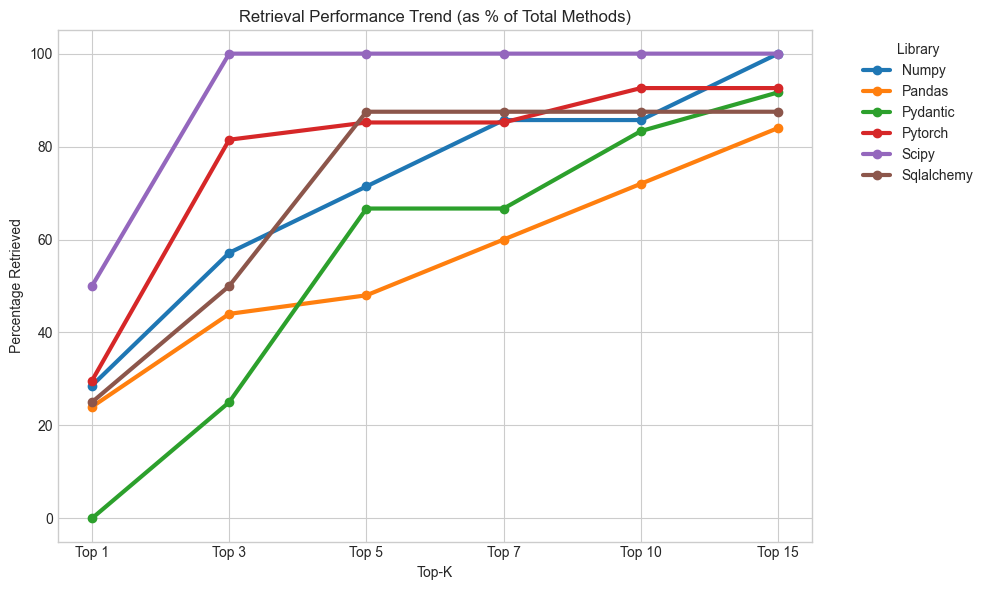

In [ ]:
import matplotlib.pyplot as plt


def plot_libwise(df: pd.DataFrame):
    """
    Plots a line chart for Top-K % retrieved per library.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    df_plot = df.set_index("library_name")[["Top 1", "Top 3", "Top 5", "Top 7", "Top 10", "Top 15"]].T
    df_plot.plot(kind="line", marker="o", figsize=(10, 6), linewidth=3)
    plt.title("Retrieval Performance Trend (as % of Total Methods)")
    plt.ylabel("Percentage Retrieved")
    plt.xlabel("Top-K")
    plt.legend(title="Library", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('images/rq2.png', transparent=True)

plot_libwise(topk_libwise_df)


In [ ]:
unique_best

,name_model,code_model,docstring_model,nodoc_model,k,name_hits,code_hits,docstring_hits,nodoc_hits,wnodoc_hits,total_methods,name_hits_norm,code_hits_norm,docstring_hits_norm,nodoc_hits_norm
0,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,1,5,26,22,17,14,96,0.052083,0.270833,0.229167,0.177083
1,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,3,26,51,41,46,47,96,0.270833,0.531250,0.427083,0.479167
2,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,5,39,64,51,55,53,96,0.406250,0.666667,0.531250,0.572917
3,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,7,43,72,51,60,59,96,0.447917,0.750000,0.531250,0.625000
4,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,10,49,80,62,66,70,96,0.510417,0.833333,0.645833,0.687500
5,ibm-granite/granite-embedding-125m-english,w601sxs/b1ade-embed,ibm-granite/granite-embedding-125m-english,avsolatorio/GIST-large-Embedding-v0,15,55,85,65,74,77,96,0.572917,0.885417,0.677083,0.770833


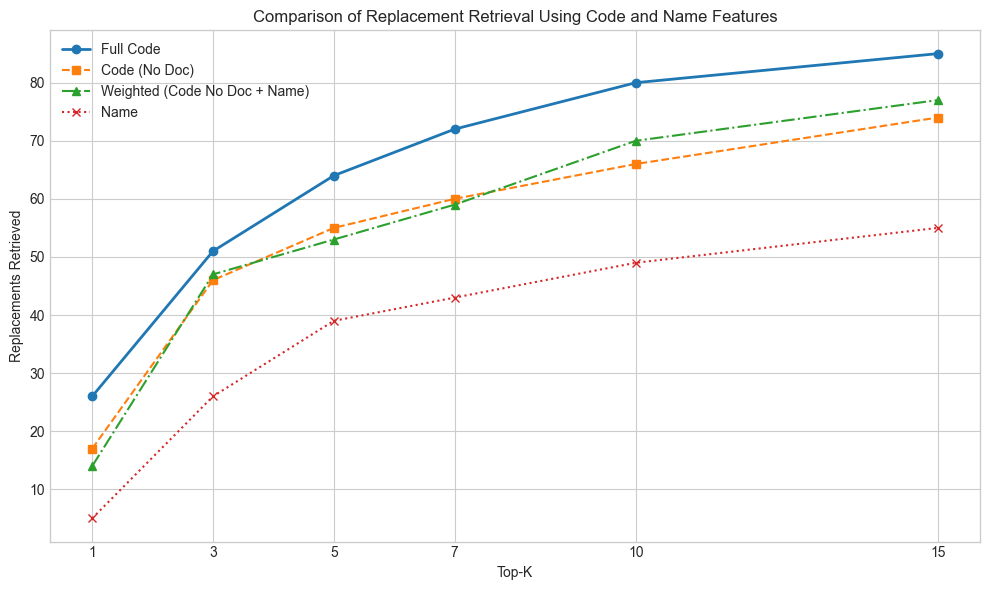

In [ ]:

def line_chart(results_df):
    top_k = results_df.k.tolist()
    code = results_df.code_hits.tolist()
    code_no_doc = results_df.nodoc_hits.tolist()
    weighted_no_doc_name = results_df.wnodoc_hits.tolist()
    name = results_df.name_hits.tolist()
    

    custom_colors = ['#FFFFCC', '#A1DAB4', '#41B6C4', '#2C7FB8']


    plt.figure(figsize=(10, 6))
    plt.plot(top_k, code, label='Full Code', marker='o', linewidth=2)
    plt.plot(top_k, code_no_doc, label='Code (No Doc)', marker='s', linestyle='--')
    plt.plot(top_k, weighted_no_doc_name, label='Weighted (Code No Doc + Name)', marker='^', linestyle='-.')
    plt.plot(top_k, name, label='Name', marker='x', linestyle=':')
    plt.xlabel('Top-K')
    plt.ylabel('Replacements Retrieved')
    plt.title('Comparison of Replacement Retrieval Using Code and Name Features')
    plt.xticks(top_k)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('images/rq3.png', transparent=True)
    plt.show()

line_chart(unique_best)